In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import tree

- NumPy and pandas for handling data
- Scikit-learn's DecisionTreeClassifier to build the decision tree model
- Matplotlib to visualize the results
- tree from Scikit-learn to visualize the decision tree structure

In [2]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

   StudyHours  PrevExamScore  Pass
0           1             30     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0


In [3]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']                           # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (8, 2), (8,)
Testing data: (2, 2), (2,)


In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42) # default Tree depth=1

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's parameters
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 1
Number of leaves: 2


The decision tree will automatically learn the best splits of the data based on the features (StudyHours and PrevExamScore) to classify whether a student passes or fails.

Tree depth: Indicates the maximum depth of the decision tree

Number of leaves: Represents the number of terminal nodes (leaves) in the tree

In [5]:
# ======================
# 2️⃣ Predictions
# ======================
y_pred = model.predict(X_test)               # Predicted class labels
y_pred_proba = model.predict_proba(X_test)   # Predicted probabilities for each class

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Predicted Probabilities:", y_pred_proba)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [1 0]
Predicted Probabilities: [[0. 1.]
 [1. 0.]]
Actual Outcomes: [1 0]


In [6]:
# ======================
# 3️⃣ Basic Evaluation
# ======================
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# ======================
# 4️⃣ ROC & AUC
# ======================
# Only works for binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)
print(f"AUC: {roc_auc:.3f}")


Accuracy: 1.000
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Thresholds: [inf  1.  0.]
AUC: 1.000


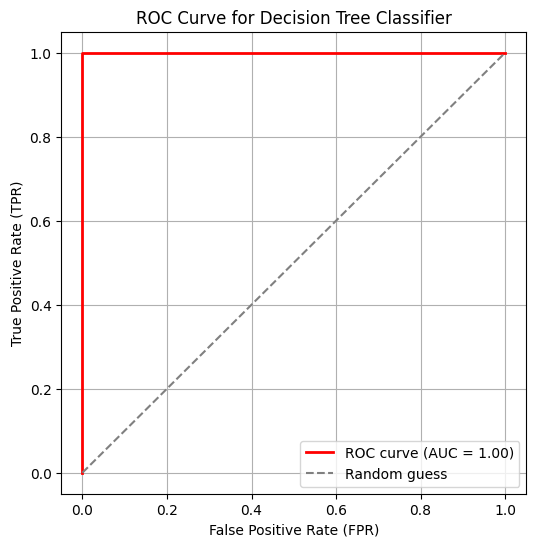

AUC: 1.000


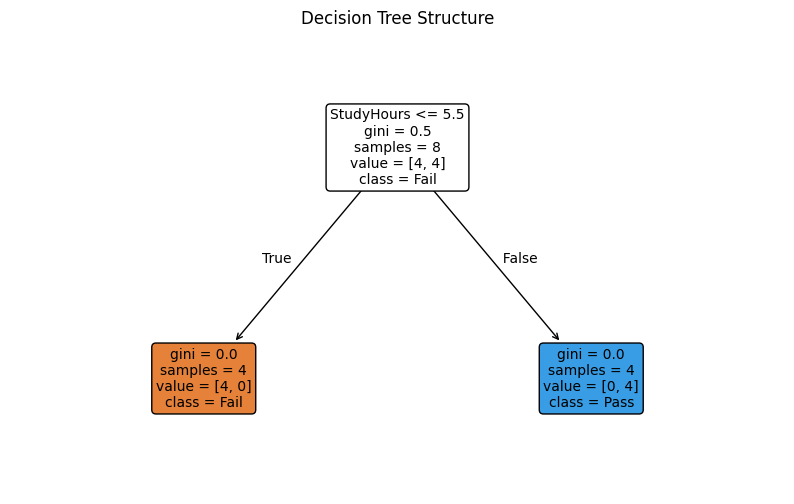

In [7]:
# ======================
# 5️⃣ Plot ROC curve
# ======================
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {roc_auc:.3f}")

# ======================
# 6️⃣ Plot Decision Tree structure
# ======================
plt.figure(figsize=(10, 6))
plot_tree(
    model,
    feature_names=['StudyHours', 'PrevExamScore'],  # 修改为你的特征名
    class_names=['Fail', 'Pass'],                   # 类别名称
    filled=True,                                   # 用颜色显示分类结果
    rounded=True,                                  # 节点圆角
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

In [8]:
# Limit the tree depth to avoid overfitting
model_tuned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
model_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = model_tuned.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Tuned Model): {accuracy_tuned}")

Accuracy (Tuned Model): 1.0
